#Devalued cost of property based on Age and Area using 2-layered Neural Network

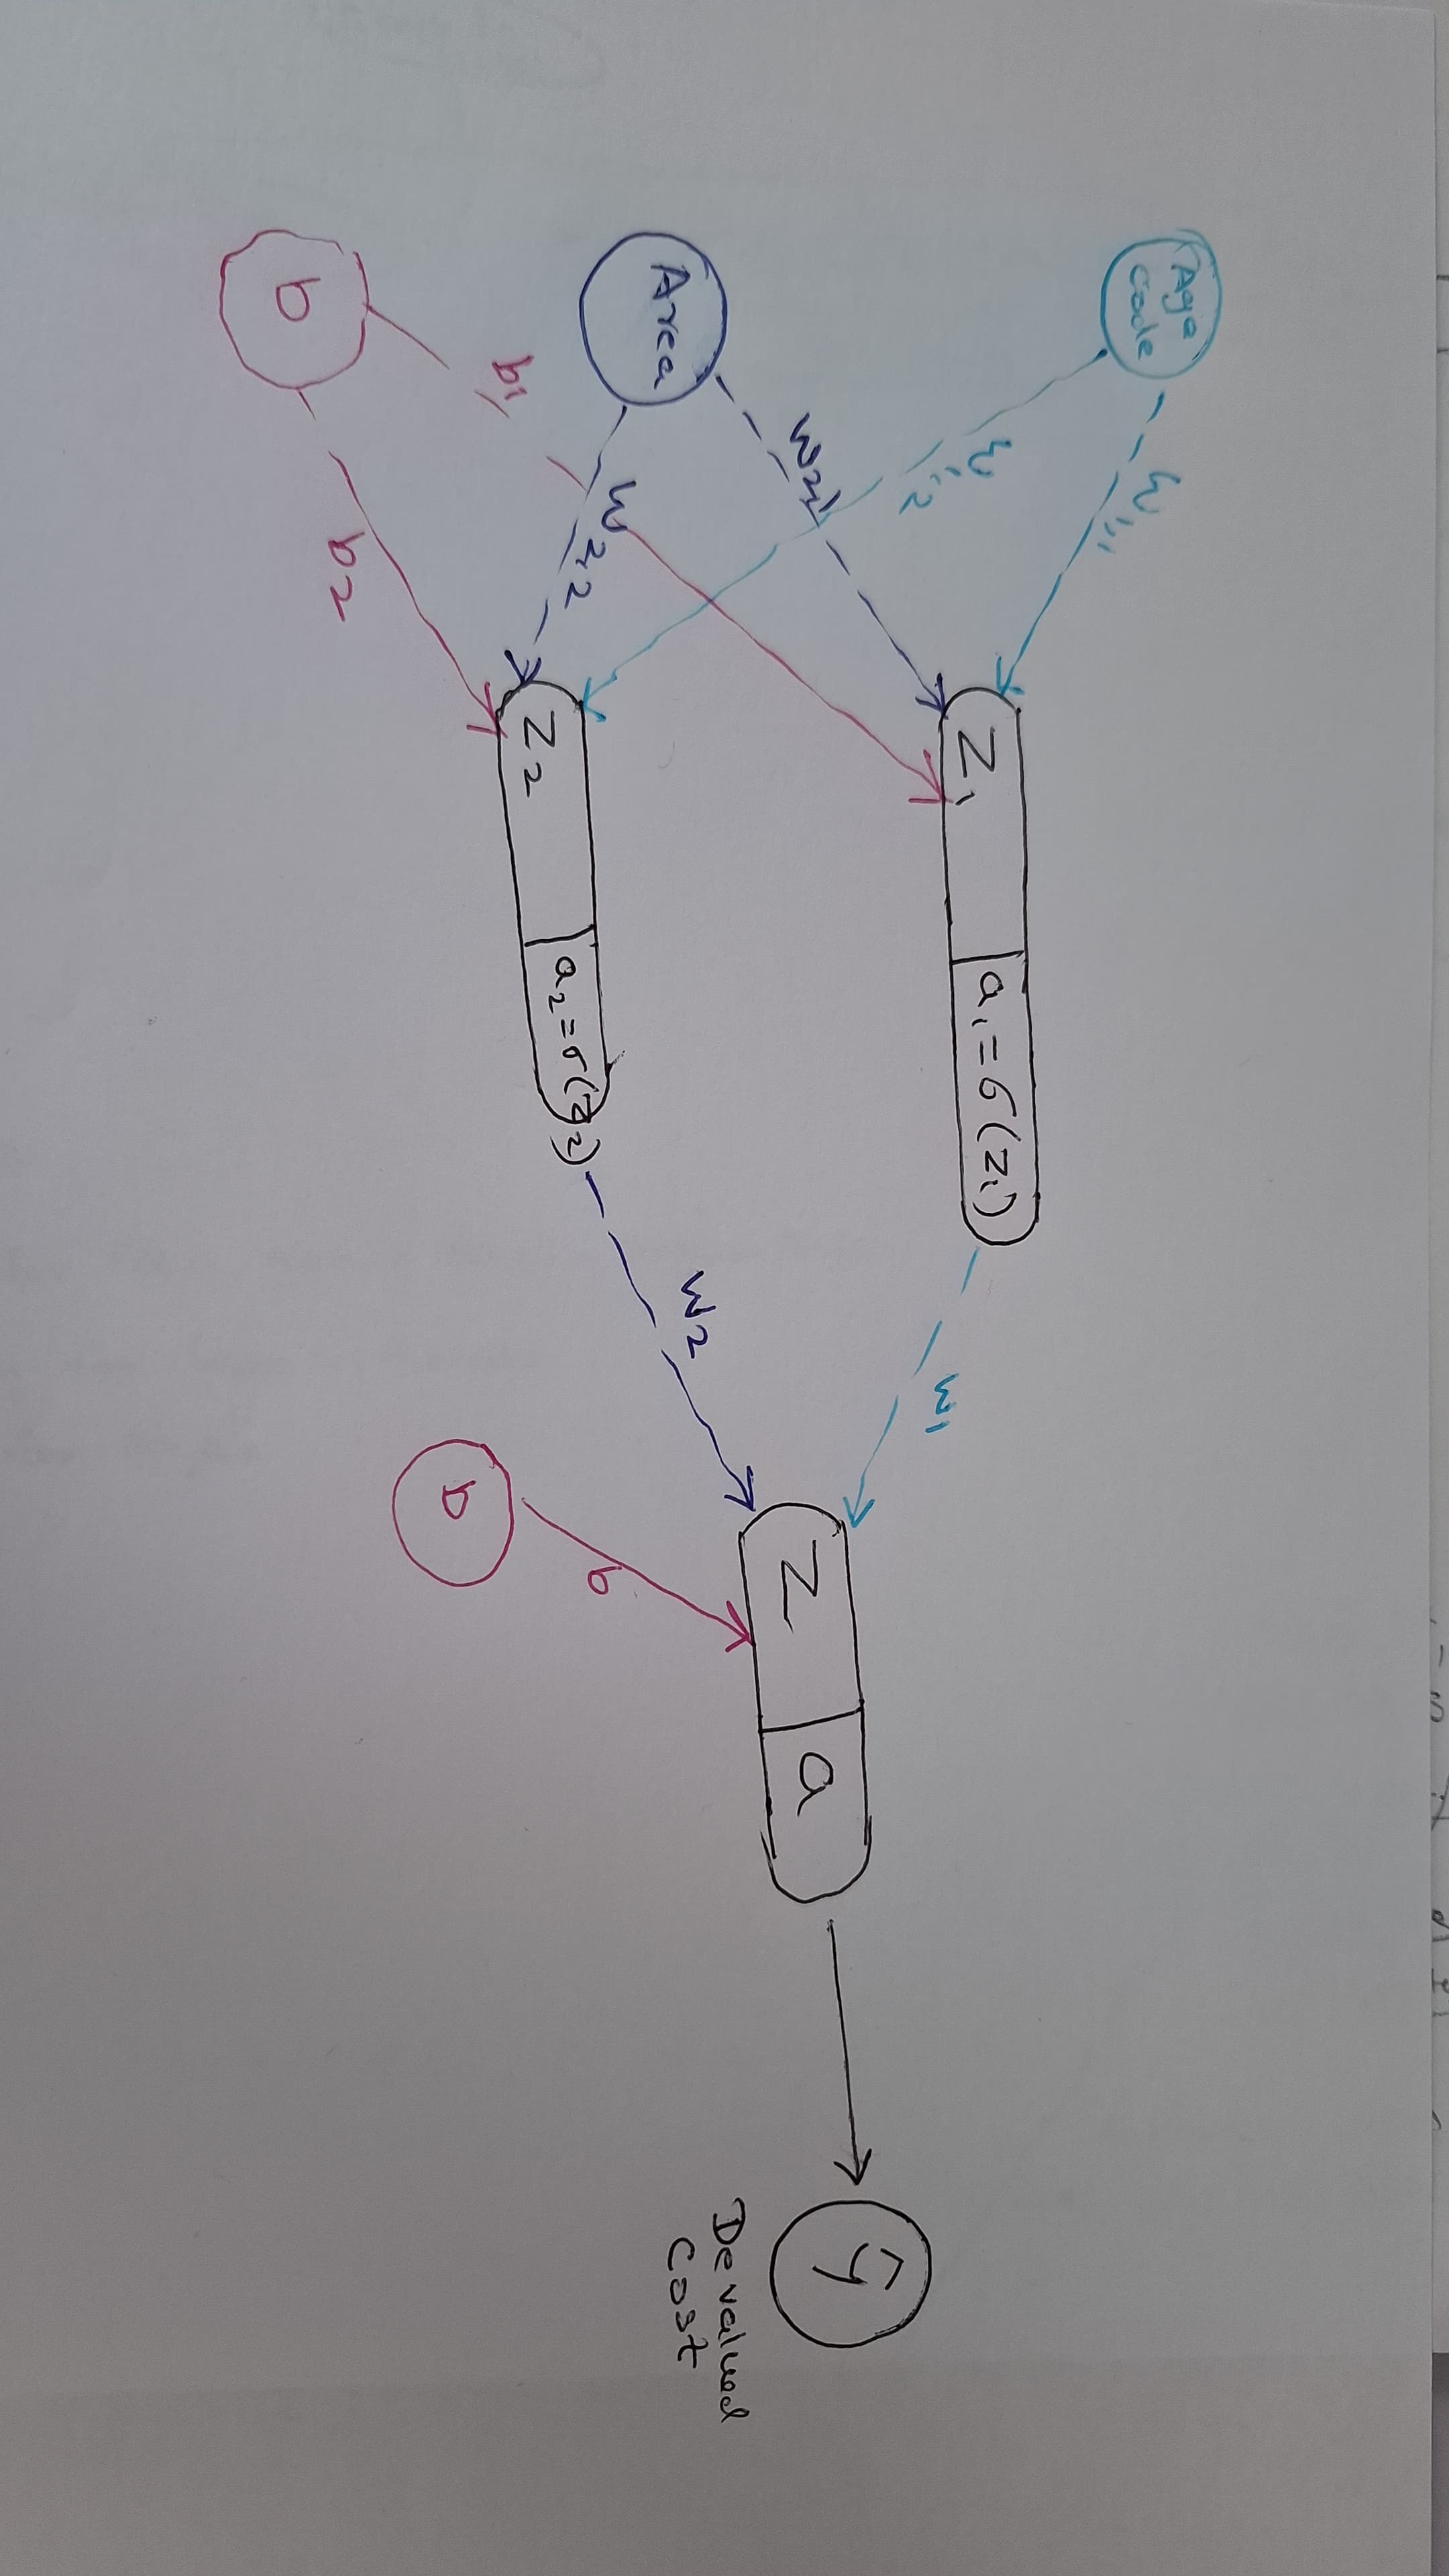

In [1]:
import numpy as np
import pandas as pd

## Read sample data

In [2]:
housepricesdf = pd.read_csv("property_price_dataset.csv")
print(housepricesdf.head())

   Age  Area  Price (Lakh ₹)
0    5  1200            80.5
1   10  1100            74.2
2    2  1500            95.6
3   15  1000            69.0
4    8  1300            85.4


In [3]:
housepricesdf.count()

,0
Age,10
Area,10
Price (Lakh ₹),10


In [4]:
housepricesdf[['Age','Area']].to_numpy()

array([[   5, 1200],
       [  10, 1100],
       [   2, 1500],
       [  15, 1000],
       [   8, 1300],
       [   3, 1600],
       [  12,  900],
       [   1, 1800],
       [   7, 1400],
       [  20,  800]])

In [5]:
#Output values
#Y=housepricesdf[['Price (Lakh ₹)']].to_numpy().reshape(-1)
Y=housepricesdf[['Price (Lakh ₹)']].to_numpy()
print(Y)

[[ 80.5]
 [ 74.2]
 [ 95.6]
 [ 69. ]
 [ 85.4]
 [ 98.1]
 [ 66.5]
 [110.3]
 [ 89.7]
 [ 58.6]]


## Determine Size of Input Layer,  the size of the hidden layer and the size of the output layer


In [6]:
m=housepricesdf.shape[0]
print(m)

10


In [7]:
n_x=housepricesdf[['Age','Area']].shape[1]
n_y=housepricesdf[['Price (Lakh ₹)']].shape[1]
print(f' n_x is {n_x}')
print(f' n_y is {n_y}')
n_h=2 #fixed in our case
print(f' hidden layer count : {n_h}')
m=housepricesdf[['Age','Area']].shape[0]
print(f' no. of samples are {m} ')

 n_x is 2
 n_y is 1
 hidden layer count : 2
 no. of samples are 10 


In [8]:
def compute_xnorm(df, col1, col2):
    """
    Compute normalized combined feature Xnorm from two input columns.

    Parameters:
        df (pd.DataFrame): Input DataFrame with two columns
        col1 (str): Name of first feature column
        col2 (str): Name of second feature column
        method (str): 'minmax' or 'zscore'

    Returns:
        pd.Series: Xnorm values
    """
    x1_norm = (df[col1] - df[col1].mean()) / df[col1].std()
    x2_norm = (df[col2] - df[col2].mean()) / df[col2].std()

    # Combine the two normalized values (Euclidean norm)

    np.sqrt(x1_norm**2 + x2_norm**2)
    X_norm = housepricesdf[['Age', 'Area']].values.T  # shape = (2, m)
    n_x = 2
    return X_norm

In [9]:
def zscore_scale(X):
    """
    Performs z-score normalization for each feature (column-wise).

    Parameters:
    X : np.array of shape (n_samples, n_features)

    Returns:
    X_z : np.array — standardized data
    means : np.array — mean of each feature
    stds : np.array — std dev of each feature
    """
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    X_z = (X - means) / stds
    return X_z, means, stds

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

## Equations applied

Z=( w1*x1 + w2*x2) 0.01 + b1*0.01

## Initialize Parameters

| Variable | Shape   | Description            |
| -------- | ------- | ---------------------- |
| X_norm   | (2, 10) | Input features         |
| W1       | (2, 2)  | Hidden layer weights   |
| b1       | (2, 1)  | Hidden layer bias      |
| Z1       | (2, 10) | Hidden pre-activation  |
| A1       | (2, 10) | Hidden activation      |
| W2       | (1, 2)  | Output layer weights   |
| b2       | (1, 1)  | Output layer bias      |
| Z2       | (1, 10) | Output pre-activation  |
| A2       | (1, 10) | Output activation      |
| dZ2      | (1, 10) | Output error           |
| dW2      | (1, 2)  | Output weight gradient |
| db2      | (1, 1)  | Output bias gradient   |
| dZ1      | (2, 10) | Hidden error           |
| dW1      | (2, 2)  | Hidden weight gradient |
| db1      | (2, 1)  | Hidden bias gradient   |


In [11]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    dictParams -- python dictionary containing the parameters:
                    W1 -- weight matrix vector of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix vector of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.randn(42)
    W1 = np.random.randn(n_h, n_x)*0.05
    print(f'W1 {W1}')
    b1 = np.zeros((n_h, 1))*0.01
    print(f'b1 {b1}')
    W2 = np.random.randn(n_y, n_h)*0.02
    print(f'W2 {W2}')
    b2 = np.zeros((n_y, 1))*0.01
    print(f'b2 {b2}')

    dictParams = {
                  "W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                  }

    return dictParams

In [12]:
parameters=initialize_parameters(n_x,n_h,n_y)

W1 [[ 4.74197838e-03 -3.98994710e-02]
 [-6.42270884e-02 -7.80135243e-06]]
b1 [[0.]
 [0.]]
W2 [[0.00341156 0.01071843]]
b2 [[0.]]


## Forward Propogation

Implementing `forward_propagation()`.

\begin{align}
Z^{[1]} &= W^{[1]} X + b^{[1]},\\
A^{[1]} &= \sigma\left(Z^{[1]}\right),\\
Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]},\\
A^{[2]} &= Z^{[2]}.\\
\end{align}


&emsp; &emsp; $z^{[1](i)} = \begin{bmatrix}z_1^{[1](i)} \\ z_2^{[1](i)}\end{bmatrix}$ is vector of size $\left(n_h \times 1\right) = \left(2 \times 1\right)$;

&emsp; &emsp; $W^{[1]} = \begin{bmatrix}W_1^{[1]} \\ W_2^{[1]}\end{bmatrix} =
\begin{bmatrix}w_{1,1}^{[1]} & w_{2,1}^{[1]} \\ w_{1,2}^{[1]} & w_{2,2}^{[1]}\end{bmatrix}$ is matrix of size $\left(n_h \times n_x\right) = \left(2 \times 2\right)$;

&emsp; &emsp; $b^{[1]} = \begin{bmatrix}b_1^{[1]} \\ b_2^{[1]}\end{bmatrix}$ is vector of size $\left(n_h \times 1\right) = \left(2 \times 1\right)$.

$$a^{[1](i)} = \sigma\left(z^{[1](i)}\right) =
\begin{bmatrix}\sigma\left(z_1^{[1](i)}\right) \\ \sigma\left(z_2^{[1](i)}\right)\end{bmatrix} = A^{[1]}$$

$$z^{[2](i)} = w_1^{[2]} a_1^{[1](i)} + w_2^{[2]} a_2^{[1](i)} + b^{[2]}\\
\\Z^{[2]}= W^{[2]} A^{[1]} + b^{[2]}$$

$$a^{[2](i)} = (z^{[2](i)})$$
$$A^{[2]} = (Z^{[2]})$$

In [13]:
#Rule for matrix multiplication

'''
If

𝐴  has shape  (𝑚 ,𝑛)

and

𝐵 has shape (𝑛,𝑝)

then

𝐴@𝐵 (or np.matmul(A, B)) has shape (𝑚,𝑝)

The inner dimensions must match — here both are n
'''

'\nIf\n\n𝐴 \xa0has\xa0shape\xa0 (𝑚 ,𝑛)\n\nand \n\n𝐵 has\xa0shape\xa0(𝑛,𝑝)\n\nthen\n\n𝐴@𝐵\xa0(or\xa0np.matmul(A,\xa0B))\xa0has\xa0shape\xa0(𝑚,𝑝)\n\nThe inner dimensions must match — here both are n\n'

In [14]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
          n_x:no. of input features
          m : how many sample data in the given dataset

    parameters -- python dictionary containing parameters (output of initialization function)

    Returns:
    A2 -- the sigmoid output of the second activation
    dictCache -- python dictionary containing Z1, A1, Z2, A2
    """

    print(f'shape of X   {X.shape}')

    # Retrieve each parameter from the dictionary "parameters".
    W1 = parameters["W1"]
    print(f'shape of W1   {W1.shape}')

    b1 = parameters["b1"]
    print(f'shape of b1   {b1.shape}')

    W2 = parameters["W2"]
    print(f'shape of W2   {W2.shape}')

    b2 = parameters["b2"]
    print(f'shape of b2   {b2.shape}')



    # Implement forward propagation to calculate Y_hat

    Z1 = np.matmul(W1, X.T) + b1
    A1 = sigmoid(Z1)
    print(f'shape of A1   {A1.shape}')

    Z2 = np.matmul(W2, A1) + b2
    print(f'shape of Z2   {Z2.shape}')

    A2 = sigmoid(Z2)
    print(f'shape of A2   {A2.shape}')

    dictCache = {
              "Z1": Z1,
              "A1": A1,
              "Z2": Z2,
              "A2": A2
             }
    print(f'Forward propogation completed')

    return A2, dictCache

In [15]:
#invoke function to test only
# Using compute_xnorm as requested, but this might cause a shape mismatch in forward_propagation
#X_norm = compute_xnorm(housepricesdf,'Age','Area')
#X_norm = X_norm.values.reshape(1, -1)  # convert Series → NumPy array, then reshape
#X_norm = housepricesdf[['Age', 'Area']].values.T  # shape = (2, m)
#n_x = 2

#print (X_norm )

In [16]:
inputattributes=housepricesdf[['Age', 'Area']].to_numpy()
print(type(inputattributes))

X_norm=zscore_scale(inputattributes)
print(f'norm inputs are {X_norm}')

<class 'numpy.ndarray'>
norm inputs are (array([[-0.57263713, -0.19738551],
       [ 0.29499488, -0.52636136],
       [-1.09321633,  0.78954203],
       [ 1.16262689, -0.8553372 ],
       [-0.05205792,  0.13159034],
       [-0.91968993,  1.11851788],
       [ 0.64204769, -1.18431305],
       [-1.26674274,  1.77646958],
       [-0.22558432,  0.46056619],
       [ 2.0302589 , -1.5132889 ]]), array([   8.3, 1260. ]), array([  5.76281181, 303.97368307]))


In [17]:
print(type(X_norm[0]))
print(type(X_norm))

<class 'numpy.ndarray'>
<class 'tuple'>


In [18]:
X_norm[0]

array([[-0.57263713, -0.19738551],
       [ 0.29499488, -0.52636136],
       [-1.09321633,  0.78954203],
       [ 1.16262689, -0.8553372 ],
       [-0.05205792,  0.13159034],
       [-0.91968993,  1.11851788],
       [ 0.64204769, -1.18431305],
       [-1.26674274,  1.77646958],
       [-0.22558432,  0.46056619],
       [ 2.0302589 , -1.5132889 ]])

In [19]:
# Y_hat,cache= forward_propagation(X_norm,parameters)
# print(Y_hat)

# Pass only the normalized data to forward_propagation
Y_hat, cache = forward_propagation(X_norm[0], parameters)
#Y_hat, cache = forward_propagation(X_norm, parameters)
print(Y_hat)

shape of X   (10, 2)
shape of W1   (2, 2)
shape of b1   (2, 1)
shape of W2   (1, 2)
shape of b2   (1, 1)
shape of A1   (2, 10)
shape of Z2   (1, 10)
shape of A2   (1, 10)
Forward propogation completed
[[0.50179198 0.50175833 0.50180543 0.5017247  0.50176731 0.50179535
  0.50174935 0.50180432 0.5017718  0.50169394]]


In [20]:
#Print y_hat and Y side by side
compareoutputdf = pd.DataFrame({
    "Y_true": Y.ravel(),
    "Y_hat": Y_hat.ravel()
})
compareoutputdf

,Y_true,Y_hat
0,80.5,0.501792
1,74.2,0.501758
2,95.6,0.501805
3,69.0,0.501725
4,85.4,0.501767
5,98.1,0.501795
6,66.5,0.501749
7,110.3,0.501804
8,89.7,0.501772
9,58.6,0.501694


## Cost Function

The most common cost function for regression problem is Mean Squared Error (MSE)

$$
L = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

here,
$$
\hat{y}=A^{[2]}
$$

In [21]:
## Compute loss: L = (1 / (2m)) * sum((y_hat - y)^2)
#L = (1 / (2 * m)) * np.sum((Y_hat - Y) ** 2)

In [22]:
def compute_cost(A2, Y):
    """
    Computes the cost function as a MSE

    Arguments:
    A2 -- The output of the neural network of shape (1, number of samples)
    Y -- "true" labels vector of shape (1, number of samples)

    Returns:
    cost -- loss
    """
    #To compute the cost using mean squared error, they need to have the same shape

    #cost = (1 / (2 * m)) * np.sum((A2_reshaped - Y) ** 2)
    cost = (1 / (2 * m)) * np.sum((A2 - Y.T) ** 2)

    return cost

In [23]:
#compute cost
cost=compute_cost(Y_hat,Y)
print(cost)

3502.15469252322


In [24]:
#To reduce the cost we calculate backward propogation where we will need partial derivatives

## Backward Propogation



1.   Impact of &emsp; $w_{1,1}^{[1]}$ On Cost Function
2.   Impact of &emsp; $w_{1,2}^{[1]}$ On Cost Function
3.   Impact of &emsp; $w_{2,1}^{[1]}$ On Cost Function
4.   Impact of &emsp; $w_{2,2}^{[1]}$ On Cost Function


\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &=
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &=
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1},\\
\frac{\partial \mathcal{L} }{ \partial W^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1}.\\
\end{align}





In [25]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implements the backward propagation, calculating gradients

    Arguments:
    dictParams -- python dictionary containing W1,b1,W2,b2
    dictCache -- python dictionary containing Z1, A1, Z2, A2
    X -- input data (normalized)
    Y -- "true" labels

    Returns:
    dictGradient -- python dictionary containing gradients with respect to different parameters
    """

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]
    A2 = A2.T

    # Backward propagation: calculate partial derivatives denoted as dW1, db1, dW2, db2, dZ1, dZ2

    print(f'shape of X   {X.shape}')
    dZ2 = A2 - Y
    print(f'shape of dZ2   {dZ2.shape}')

    #dW2 = 1/m * np.dot(dZ2, A1.T)
    dW2 = (1/m) * np.dot(A1, dZ2)
    print(f'shape of dW2   {dW2.shape}')

    #db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    print(f'shape of db2   {db2.shape}')

    #dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dZ1 = np.dot(W2.T, dZ2.T) * (A1 * (1 - A1))
    print(f'shape of dZ1   {dZ1.shape}')

    dW1 = 1/m * np.dot(dZ1, X)
    #dW1 = (1/m) * np.dot(dZ1, X)
    print(f'shape of dW1   {dW1.shape}')

    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    print(f'shape of db1   {db1.shape}')

    dictGradient = {
             "dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2
             }
    print(f'Backward propogation completed')

    return dictGradient

In [26]:
X_norm

(array([[-0.57263713, -0.19738551],
        [ 0.29499488, -0.52636136],
        [-1.09321633,  0.78954203],
        [ 1.16262689, -0.8553372 ],
        [-0.05205792,  0.13159034],
        [-0.91968993,  1.11851788],
        [ 0.64204769, -1.18431305],
        [-1.26674274,  1.77646958],
        [-0.22558432,  0.46056619],
        [ 2.0302589 , -1.5132889 ]]),
 array([   8.3, 1260. ]),
 array([  5.76281181, 303.97368307]))

In [27]:
#invoking backward propogation multiple times till we get Y_hat close to Y

grads = backward_propagation(parameters, cache, X_norm[0], Y)

print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

shape of X   (10, 2)
shape of dZ2   (10, 1)
shape of dW2   (2, 1)
shape of db2   (1, 1)
shape of dZ1   (2, 10)
shape of dW1   (2, 2)
shape of db1   (2, 1)
Backward propogation completed
dW1 = [[ 0.01205663 -0.01297287]
 [ 0.03795164 -0.04080681]]
db1 = [[-0.0701478 ]
 [-0.22028806]]
dW2 = [[-40.97549744]
 [-41.37131089]]
db2 = [[-82.28823375]]


In [28]:
#Now as we got new set of values for dW1,dW2,db1,db2, we need to update the parameters and do forward propogation again

## Update Parameters

\begin{align}
W^{[1]} &= W^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[1]} },\\
b^{[1]} &= b^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[1]} },\\
W^{[2]} &= W^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[2]} },\\
b^{[2]} &= b^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[2]} }.\\
\\
Let Learning Rate (\alpha) =0.05
\end{align}



In [29]:
def update_parameters(parameters, grads, learning_rate=0.05):
    """
    Updates parameters using the gradient descent update rule

    Arguments:
    parameters -- python dictionary containing parameters (dictParameters)
    grads -- python dictionary containing gradients (dictGradient)
    learning_rate -- learning rate for gradient descent(alpha)

    Returns:
    parameters -- python dictionary containing updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters".
    W1 = parameters["W1"]

    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads".

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter.

    W1 = W1 - learning_rate * grads["dW1"]
    b1 = b1 - learning_rate * grads["db1"]
    W2 = W2 - learning_rate * grads["dW2"]
    b2 = b2 - learning_rate * grads["db2"]


    dictParams = {
                  "W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                  }
    print(f'Update parameters completed')

    return dictParams

In [30]:
parameters_updated = update_parameters(parameters, grads)

Update parameters completed


In [31]:
#Now recalculate backward propogation and update parameters till we get some Y_hat closer to Y

## Overall Neural Network Model

In [32]:
def neuralnetworkmodel(X, Y, n_h, num_iterations=3, learning_rate=0.05, print_cost=True):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    # Initialize parameters.
    parameters = initialize_parameters(n_x, n_h, n_y)


    # Loop.
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads,learning_rate)

        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))



    return parameters

In [33]:
latestparams=neuralnetworkmodel(X_norm[0], Y,2)

W1 [[-0.00722664  0.03255287]
 [-0.03449617 -0.03235707]]
b1 [[0.]
 [0.]]
W2 [[-0.00945838 -0.04051864]]
b2 [[0.]]
shape of X   (10, 2)
shape of W1   (2, 2)
shape of b1   (2, 1)
shape of W2   (1, 2)
shape of b2   (1, 1)
shape of A1   (2, 10)
shape of Z2   (1, 10)
shape of A2   (1, 10)
Forward propogation completed
shape of X   (10, 2)
shape of dZ2   (10, 1)
shape of dW2   (2, 1)
shape of db2   (1, 1)
shape of dZ1   (2, 10)
shape of dW1   (2, 2)
shape of db1   (2, 1)
Backward propogation completed
Update parameters completed
Cost after iteration 0: 3502.814910
shape of X   (10, 2)
shape of W1   (2, 2)
shape of b1   (2, 1)
shape of W2   (2, 2)
shape of b2   (1, 1)
shape of A1   (2, 10)
shape of Z2   (2, 10)
shape of A2   (2, 10)
Forward propogation completed
shape of X   (10, 2)
shape of dZ2   (10, 2)
shape of dW2   (2, 2)
shape of db2   (1, 2)
shape of dZ1   (2, 10)
shape of dW1   (2, 2)
shape of db1   (2, 1)
Backward propogation completed
Update parameters completed
Cost after iteratio

ValueError: operands could not be broadcast together with shapes (2,10) (1,2) 